In [1]:
import datetime
import scipy.io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import bokeh.plotting as bk
bk.output_notebook()

Loading BokehJS ...

## Yahoo! Finance

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2017, 4, 30)
AAPL_yahoo = web.DataReader("AAPL", 'yahoo', start, end)
IBM_yahoo = web.DataReader("IBM", 'yahoo', start, end)

In [4]:
AAPL_yahoo.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.874997,112.499998,101.687501,111.937502,133949200,3.610739
2000-01-04,108.250001,110.625002,101.187503,102.500003,128094400,3.306316
2000-01-05,103.749998,110.562497,103.000001,103.999997,194580400,3.354701
2000-01-06,106.124999,106.999999,94.999998,94.999998,191993200,3.064391
2000-01-07,96.499999,101.000002,95.500003,99.500001,115183600,3.209546


In [5]:
IBM_yahoo.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,112.4375,116.0000,111.875,116.0000,10347700,86.912107
2000-01-04,114.0000,114.5000,110.875,112.0625,8227800,83.961966
2000-01-05,112.9375,119.7500,112.125,116.0000,12733200,86.912107
2000-01-06,118.0000,118.9375,113.500,114.0000,7971900,85.413623
2000-01-07,117.2500,117.9375,110.625,113.5000,11856700,85.039002


### Plotting timeseries 

In [7]:
fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset", title = 'Closing Prices  - From Yahoo! Finance',
       plot_width=750, plot_height=400)
fig.line(AAPL_yahoo.index, AAPL_yahoo['Adj Close'],
     line_width=2, color='darkred', legend='Apple')
fig.line(IBM_yahoo.index, IBM_yahoo['Adj Close'],
     line_width=2, color='royalblue', legend='IBM')
fig.legend.orientation = "horizontal"
bk.show(fig)

In [8]:
df = AAPL_yahoo[-100:]
mids = (df['High']+df['Low'])/2
spans = df['Close']-df['Open']
inc = df['Close']>=df['Open']
dec = df['Close']<df['Open']
w = 18*60*60*1000               # 2/3 of a day in ms

### Plotting candlesticks

In [10]:
fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset",
       title = 'Candlesticks  - From Yahoo! Finance',
       plot_width=750, plot_height=400)
fig.segment(df.index, df['High'], df.index, df['Low'], color='black')
fig.rect(df.ix[inc].index, mids[inc], w, spans[inc],
     fill_color="lawngreen", line_color="black")
fig.rect(df.ix[dec].index, mids[dec], w, spans[dec],
     fill_color="crimson", line_color="black")
fig.legend.orientation = "horizontal"
bk.show(fig)

### Plotting data ranges

In [11]:
x = df.index.append(df.ix[::-1].index)
y = df['Low'].append(df['High'].ix[::-1])

fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset",
       title = "Mid Trading Values with Range  - From Yahoo! Finance",
       plot_width=750, plot_height=400)
fig.patch(x,y, color='darkred', alpha=0.3, line_color='violet', line_alpha=0.6)
fig.line(df.index, mids, line_width=2, color='darkred', legend='Apple')
bk.show(fig)

### Plotting multiple plots

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

c:\anaconda3\envs\spark\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  


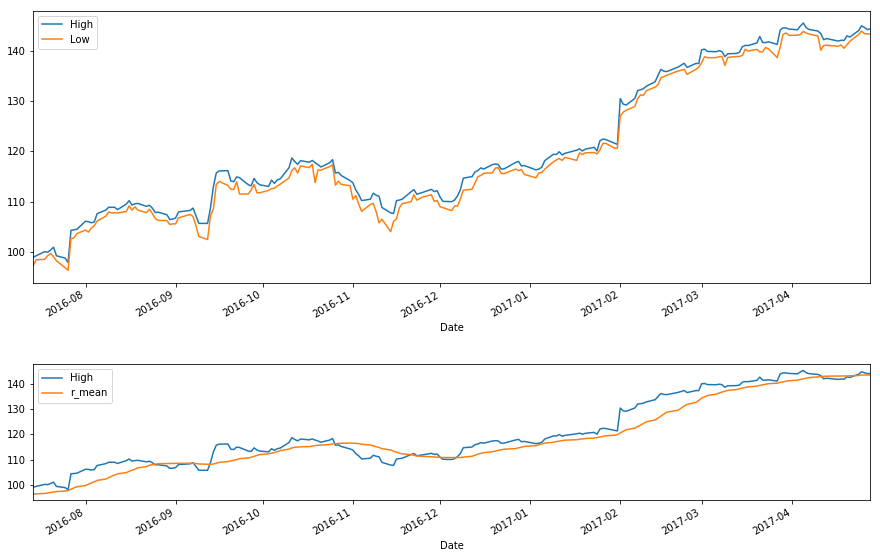

In [13]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,10));
fig = bk.figure(plot_width=300, plot_height=200)
gs = gridspec.GridSpec(2, 2, height_ratios=[2,1], hspace=0.4)
ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, :])
AAPL_yahoo.iloc[-200:,1:3].plot(ax=ax0)
AAPL_yahoo['r_mean'] = pd.rolling_mean(AAPL_yahoo.ix[:,'High'],20)
AAPL_yahoo.ix[-200:,['High', 'r_mean']].plot(ax=ax1)

### Plotting multiple plots 

In [14]:
ax0 = bk.figure(plot_width=700, plot_height=300, title=None)
data0 = AAPL_yahoo.iloc[-200:,1:3]
ax0.line(x=np.arange(len(data0)), y=data0['High'], 
         legend='High', line_color='blue')
ax0.line(x=np.arange(len(data0)), y=data0['Low'], 
         legend='Low', line_color='green')

ax1 = bk.figure(plot_width=700, plot_height=300, title=None)
AAPL_yahoo['r_mean'] = pd.rolling_mean(AAPL_yahoo.ix[:,'High'],20)
data1 = AAPL_yahoo.ix[-200:]
ax1.line(x=np.arange(len(data1)), y=data1['High'],
         legend='High', line_color='blue')
ax1.line(x=np.arange(len(data1)), y=data1['r_mean'],
        legend='r_mean', line_color='green')

fig = bk.gridplot([[ax0], [ax1]])
bk.show(fig)

c:\anaconda3\envs\spark\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':


## Google Finance

In [15]:
AAPL_google = web.DataReader("AAPL", 'google', start, end)
IBM_google = web.DataReader("IBM", 'google', start, end)

In [17]:
fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset", title='Closing Prices - From Google Finance',
       plot_width=750, plot_height=400)
fig.line(AAPL_google.index, AAPL_google['Close'],
         line_width=2, color='darkred', legend='Apple')
fig.line(IBM_google.index, IBM_google['Close'],
         line_width=2, color='royalblue', legend='IBM')
fig.legend.orientation = "horizontal"
bk.show(fig)